In [1]:
from geecs_data_utils import ScanData, ScanPaths
import matplotlib.pyplot as plt
from image_analysis.offline_analyzers.standard_1d_analyzer import Standard1DAnalyzer

from geecs_data_utils.config_roots import image_analysis_config

import logging

logging.getLogger("image_analysis").setLevel(logging.WARNING)

image_analysis_config.set_base_dir(ScanPaths.paths_config.image_analysis_configs_path)

2025-12-08 12:59:38,715 - geecs_data_utils.config_roots - INFO - Image analysis config base dir set to D:\Users\sbarber.BELLAAPPSERVER\Documents\GitHub\GEECS-Plugins-Configs\image_analysis_configs


WindowsPath('D:/Users/sbarber.BELLAAPPSERVER/Documents/GitHub/GEECS-Plugins-Configs/image_analysis_configs')

In [2]:
sd = ScanData.from_date(year=2025, month=8, day=7, number=7, experiment="Undulator")

In [3]:
dev_name = "Z_Test_Scope"

analyzer = Standard1DAnalyzer(dev_name)
file_path = sd.data_frame[f"{dev_name}_expected_path"][1]
result = analyzer.analyze_image_file(file_path)
data = result.line_data

2025-12-08 12:59:38,808 - geecs_data_utils.config_roots - INFO - Found config (direct): D:\Users\sbarber.BELLAAPPSERVER\Documents\GitHub\GEECS-Plugins-Configs\image_analysis_configs\Z_Test_Scope.yaml


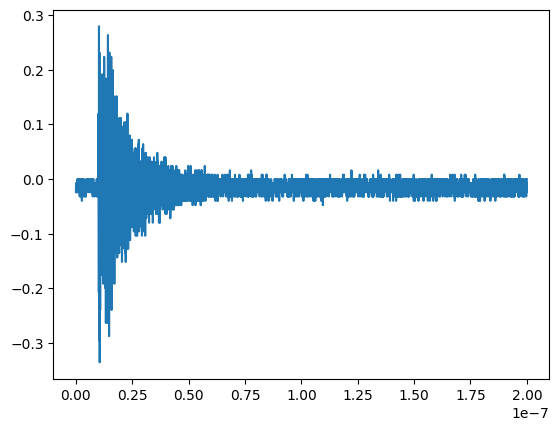

In [4]:
plt.plot(data[:, 0], data[:, 1])
plt.show()

2025-12-08 12:59:39,006 - geecs_data_utils.config_roots - INFO - Found config (direct): D:\Users\sbarber.BELLAAPPSERVER\Documents\GitHub\GEECS-Plugins-Configs\image_analysis_configs\U_BCaveICT.yaml


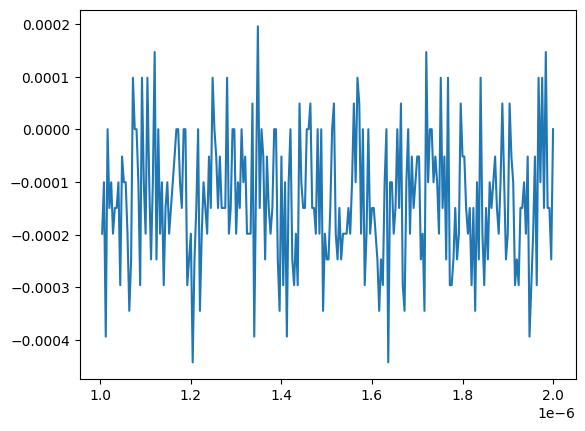

In [5]:
sd = ScanData.from_date(
    year=2025, month=9, day=24, number=10, experiment="Undulator", append_paths=False
)

dev_name = "U_BCaveICT"

analyzer = Standard1DAnalyzer(line_config_name=dev_name)
file_path = sd.paths.get_device_shot_path(
    tag=sd.paths.get_tag(), device_name=dev_name, shot_number=2, file_extension="tdms"
)
result = analyzer.analyze_image_file(file_path)
data = result.line_data

plt.plot(data[:, 0], data[:, 1])
plt.show()

2025-12-08 12:59:39,163 - geecs_data_utils.config_roots - INFO - Found config (direct): D:\Users\sbarber.BELLAAPPSERVER\Documents\GitHub\GEECS-Plugins-Configs\image_analysis_configs\U_BCaveMagSpec-interpSpec.yaml


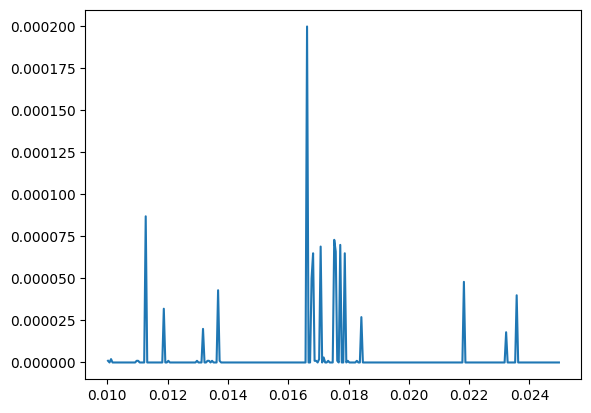

{'line_name': 'U_BCaveMagSpec-interpSpec',
 'data_type': <Data1DType.TSV: 'tsv'>,
 'config_name': 'U_BCaveMagSpec-interpSpec',
 'data_format': 'Charge density vs Energy',
 'x_units': None,
 'y_units': None,
 'x_label': 'Momentum_GeV/c',
 'y_label': 'ChargeDen_pC/GeV'}

In [6]:
sd = ScanData.from_date(
    year=2025, month=9, day=24, number=10, experiment="Undulator", append_paths=False
)

dev_name = "U_BCaveMagSpec-interpSpec"

analyzer = Standard1DAnalyzer(line_config_name=dev_name)
file_path = sd.paths.get_device_shot_path(
    tag=sd.paths.get_tag(), device_name=dev_name, shot_number=2, file_extension="txt"
)

file_path = file_path.parent / "Scan010_U_BCaveMagSpec_001.txt"
result = analyzer.analyze_image_file(file_path)
data = result.line_data

plt.plot(data[:, 0], data[:, 1])
# plt.xlabel(f"{result['analyzer_input_parameters']} ({result.x_units})")
# plt.ylabel(f"{result.y_label} ({result.y_units})")
plt.show()
result.metadata